In [13]:
import pickle 
import pandas as pd
import clustereval as ce
import numpy as np
import glob
import re
import plotnine as pn
import igraph as ig
import leidenalg

In [2]:
sim_data=pd.read_csv('simulated_clusters.csv.gz')
sim_mat = sim_data[['x', 'y']]

In [3]:
sim_data

,x,y,default_label
0,1.280327,15.381050,A
1,0.293652,14.313635,A
2,-1.835256,13.247640,A
3,0.313558,16.152779,A
4,1.800673,14.342366,A
...,...,...,...
895,1.130785,2.078716,I
896,-0.807272,-0.562099,I
897,1.368739,-1.933888,I
898,0.319060,-1.656574,I


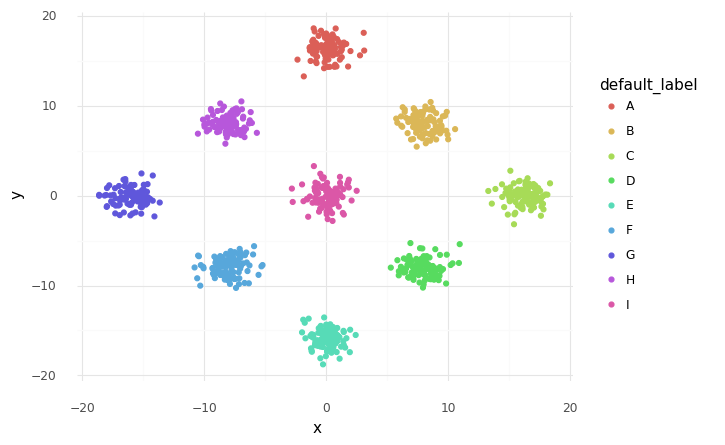

<ggplot: (2932176543699)>

In [4]:
(
    pn.ggplot(sim_data) + 
    pn.geom_point(pn.aes(x='x', y='y', color = 'default_label')) + 
    pn.theme_minimal()
)

In [31]:
clu_obj = ce.cluster.ClusterExperiment(sim_mat, 0)
clu_obj.buildNeighborGraph(10,'l2', 150, False, False, None, None )
sim_data['no_ptb_clu_labels'] = clu_obj.run_leiden(vertex_partition_method=leidenalg.RBConfigurationVertexPartition, n_iter=5, 
                                                   resolution=1.0, jac_weighted_edges='weight' )
sim_data['no_ptb_clu_labels'] = sim_data['no_ptb_clu_labels'].astype(str)
clu_obj.nn_graph.vs['default_label'] = sim_data.default_label.to_list()

a,b, spread, dist 1.576943460405378 0.8950608781227859 1.0 0.1
	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs


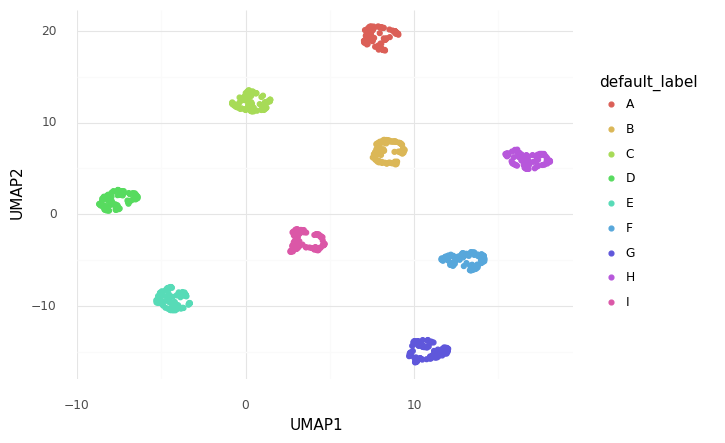

<ggplot: (2932194368190)>

In [32]:
clu_umap = pd.DataFrame(clu_obj.run_UMAP()[0], columns = ['UMAP1', 'UMAP2'] ).join(sim_data)
(
    pn.ggplot(clu_umap) + 
    pn.geom_point(pn.aes(x='UMAP1', y='UMAP2', color = 'default_label')) + 
    pn.theme_minimal()
)

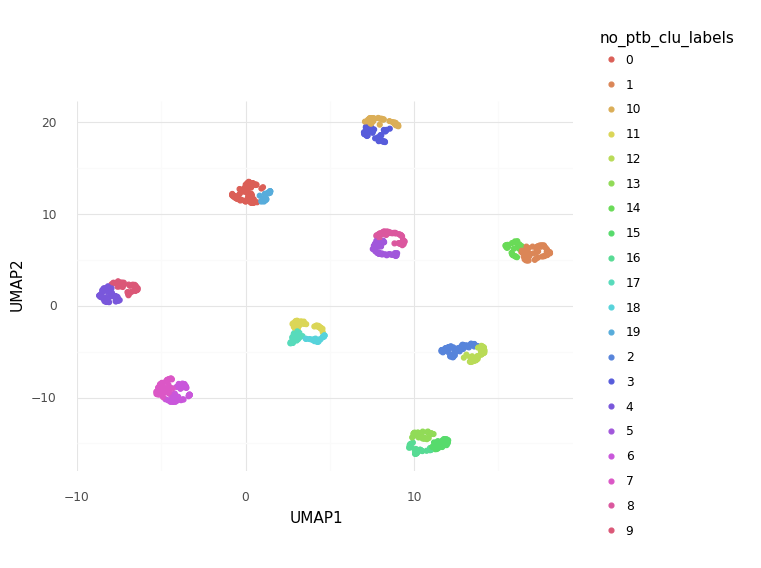

<ggplot: (2932193405630)>

In [34]:
(
    pn.ggplot(clu_umap) + 
    pn.geom_point(pn.aes(x='UMAP1', y='UMAP2', color = 'no_ptb_clu_labels')) + 
    pn.theme_minimal()
)

In [35]:
node_alpha= 1
visual_style = {}
visual_style["vertex_size"] = 5
color_dict = {'A': (1.0, 0.0, 0.0, node_alpha), 
              'B': (1.0, 0.6470588235294118, 0.0, node_alpha),
              'C':(1.0, 1.0, 0.0, node_alpha), 
              'D':(0.0, 1.0, 0.0, node_alpha), 
              'E':(0.0, 0.0, 1.0, node_alpha), 
              'F':(0.29411764705882354, 0.0, 0.5098039215686274, node_alpha), 
              'G' :(0.9333333333333333, 0.5098039215686274, 0.9333333333333333, node_alpha), 
              'H':(1.0, 0.7529411764705882, 0.796078431372549, node_alpha), 
              'I':(0.0, 1.0, 1.0, node_alpha)}
visual_style["vertex_color"] = [color_dict[dl] for dl in clu_obj.nn_graph.vs['default_label']]
visual_style['edge_color'] = [(0.0, 0.0, 0.0, .3)]



In [36]:
default_layout = clu_obj.nn_graph.layout()

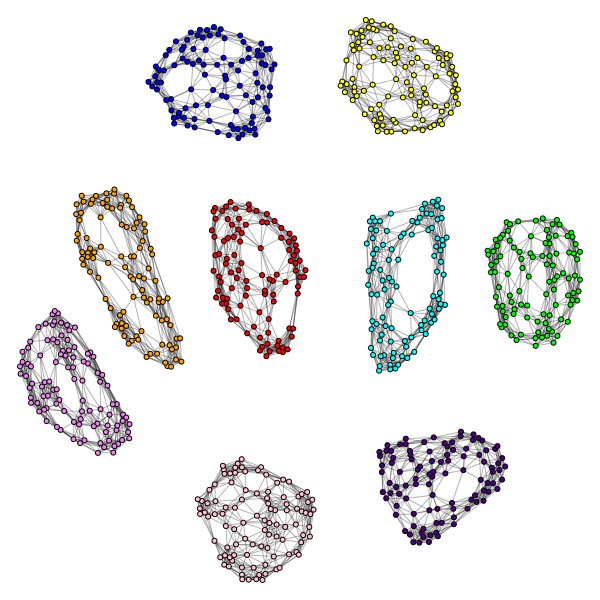

In [37]:
ig.plot(clu_obj.nn_graph, layout = default_layout, **visual_style)

In [38]:
clu_obj.run_perturbation(edge_permut_frac=.05)

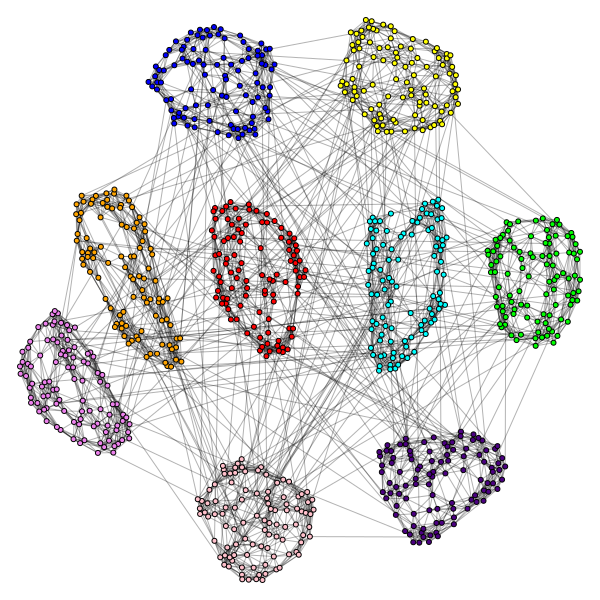

In [39]:
ig.plot(clu_obj.nn_graph, layout = default_layout, **visual_style)

In [44]:
clu_umap['edge_ptb_.05'] =clu_obj.run_leiden(vertex_partition_method=leidenalg.RBConfigurationVertexPartition, n_iter=5, resolution=1.0, jac_weighted_edges='weight' )
clu_umap['edge_ptb_.05']=clu_umap['edge_ptb_.05'].astype(str)

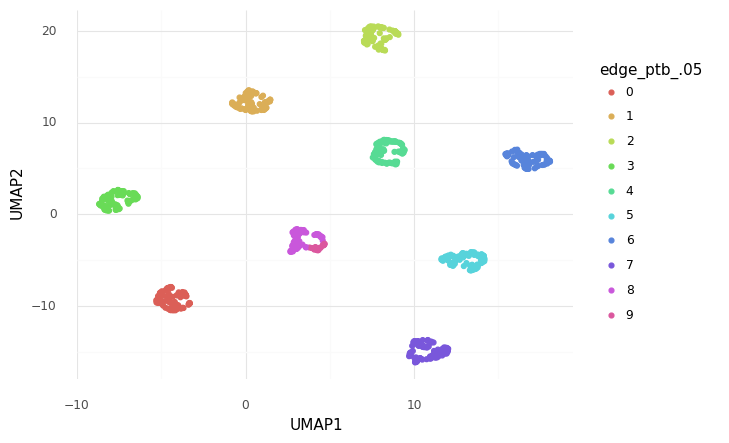

<ggplot: (2932192461069)>

In [45]:
(
    pn.ggplot(clu_umap) + 
    pn.geom_point(pn.aes(x='UMAP1', y='UMAP2', color = 'edge_ptb_.05')) + 
    pn.theme_minimal()
)

In [41]:
sim_data

,x,y,default_label,no_ptb_clu_labels,edge_ptb_.05
0,1.280327,15.381050,A,3,7
1,0.293652,14.313635,A,10,7
2,-1.835256,13.247640,A,10,7
3,0.313558,16.152779,A,3,7
4,1.800673,14.342366,A,10,7
...,...,...,...,...,...
895,1.130785,2.078716,I,17,8
896,-0.807272,-0.562099,I,11,9
897,1.368739,-1.933888,I,11,8
898,0.319060,-1.656574,I,11,8
